Importing Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [47]:
import re
import nltk
from nltk.util import pr
st=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))

In [132]:
df=pd.read_csv('twitter_data.csv')

In [133]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [134]:
df['labels']=df['class'].map({0:"Hate Speech Decteded",1:"Offensive Language Detected",2:"Neither Hate Nor offensive"})

In [135]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate Nor offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected


In [136]:
df=df[['tweet','labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate Nor offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected


EDA of the DataFrame

In [170]:
df.shape

(24783, 2)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [177]:
df.isnull().sum()

tweet     0
labels    0
dtype: int64

In [182]:
df.duplicated().sum()

293

In [185]:
df.drop_duplicates(inplace=True)

In [159]:
fr=df['labels'].value_counts()

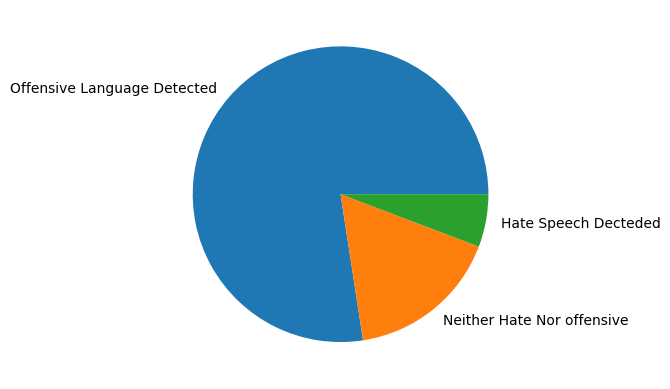

In [165]:
plt.pie(fr,labels=fr.index)
plt.show()

Removing unwanted text from data

In [137]:
def clean(text):
    text=str(text).lower()
    text=re.sub(r'\[.*?\]','',text)
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub(r'<.*?>+','',text)
    text=re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'\w*\d\w*','',text)
    text=[st.stem(word) for word in text.split() if word not in stopword]
    text=" ".join(text)
    return text

In [138]:
x=df['tweet'][0]

In [139]:
x

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [140]:
clean(x)

'rt mayasolov woman shouldnt complain clean hous amp man alway take trash'

In [141]:
df['tweet']=df['tweet'].apply(clean)


In [142]:
df.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,Neither Hate Nor offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language Detected
2,rt urkindofbrand dawg rt ever fuck bitch start...,Offensive Language Detected
3,rt cganderson vivabas look like tranni,Offensive Language Detected
4,rt shenikarobert shit hear might true might fa...,Offensive Language Detected


Vectorization

In [144]:
x=np.array(df['tweet'])
y=np.array(df['labels'])
cv=CountVectorizer()
x=cv.fit_transform(x)

Splitting the data

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Train the model

In [146]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [147]:
y_pred=classifier.predict(x_test)

In [148]:
y_pred

array(['Offensive Language Detected', 'Offensive Language Detected',
       'Offensive Language Detected', ..., 'Offensive Language Detected',
       'Offensive Language Detected', 'Offensive Language Detected'],
      dtype=object)

Checking Accuracy of the model

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [150]:
accuracy=accuracy_score(y_pred,y_test)
mat=confusion_matrix(y_pred,y_test)
rep=classification_report(y_pred,y_test)
print("accuracy is ",accuracy)
print(rep)

accuracy is  0.8712931208392173
                             precision    recall  f1-score   support

       Hate Speech Decteded       0.33      0.35      0.34       274
 Neither Hate Nor offensive       0.83      0.80      0.82       864
Offensive Language Detected       0.92      0.92      0.92      3819

                   accuracy                           0.87      4957
                  macro avg       0.70      0.69      0.69      4957
               weighted avg       0.87      0.87      0.87      4957



<Axes: >

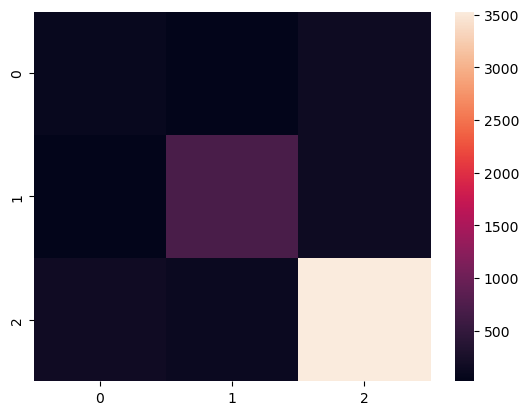

In [151]:
sns.heatmap(mat)

predicting some speech

In [193]:
test_data="i'll kill you"
td=cv.transform([test_data]).toarray()
print(classifier.predict(td)[0])

Hate Speech Decteded


In [169]:
import pickle 
pickle.dump(classifier,open('classifier.pkl','wb'))
pickle.dump(cv,open('CountVect.pkl','wb'))